In [11]:
import numpy as np
import pandas as pd
from Bio import SeqIO
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from Bio.SeqUtils import GC
plt.style.use('ggplot')
import importlib
import Module.cnv as cnv
importlib.reload(cnv)


<module 'Module.cnv' from '/home/sedra/Intership/cnv/Module/cnv.py'>

In [2]:
liver_df = pd.read_csv (r'/home/sedra/Intership/mm_liver_met.csv')
bin_df = pd.read_csv (r'/home/sedra/Intership/mm10_1Mb_bins.txt', sep = '\s+')

In [5]:
indices = cnv.index_of_chr(bin_df)

In [6]:
chr1 = (SeqIO.read("chr1.fna", "fasta")).seq
chr2 = (SeqIO.read("chr2.fna", "fasta")).seq
chr3 = (SeqIO.read("chr3.fna", "fasta")).seq
chr4 = (SeqIO.read("chr4.fna", "fasta")).seq
chr5 = (SeqIO.read("chr5.fna", "fasta")).seq
chr6 = (SeqIO.read("chr6.fna", "fasta")).seq
chr7 = (SeqIO.read("chr7.fna", "fasta")).seq
chr8 = (SeqIO.read("chr8.fna", "fasta")).seq
chr9 = (SeqIO.read("chr9.fna", "fasta")).seq
chr10 = (SeqIO.read("chr10.fna", "fasta")).seq
chr11 = (SeqIO.read("chr11.fna", "fasta")).seq
chr12 = (SeqIO.read("chr12.fna", "fasta")).seq
chr13 = (SeqIO.read("chr13.fna", "fasta")).seq
chr14 = (SeqIO.read("chr14.fna", "fasta")).seq
chr15 = (SeqIO.read("chr15.fna", "fasta")).seq
chr16 = (SeqIO.read("chr16.fna", "fasta")).seq
chr17 = (SeqIO.read("chr17.fna", "fasta")).seq
chr18 = (SeqIO.read("chr18.fna", "fasta")).seq
chr19 = (SeqIO.read("chr19.fna", "fasta")).seq
chrX = (SeqIO.read("chrX.fna", "fasta")).seq
chrY = (SeqIO.read("chrY.fna", "fasta")).seq
chrM = (SeqIO.read("chrMT.fna", "fasta")).seq

In [7]:
chr_list = [chr1,chr2,chr3,chr4,chr5,chr6,chr7,chr8,chr9,chr10,chr11,
            chr12,chr13,chr14,chr15,chr16,chr17,chr18,chr19,chrX,chrY,chrM]


In [9]:
cg_content = cnv.countCGall(chr_list,indices,bin_df)

In [12]:
cg_content1 = cnv.countCGall1(chr_list,indices,bin_df)

In [13]:
bin_df['GC_content'] = cg_content 
bin_df['GC_content1'] = cg_content1 

In [14]:
copy_df = pd.merge(bin_df, liver_df, on = 'bin_ind', how = 'inner')

In [15]:
copy_df = copy_df.drop(copy_df[copy_df.GC_content == 0].index)
copy_df = copy_df.drop(copy_df[copy_df.counts > 10000].index)

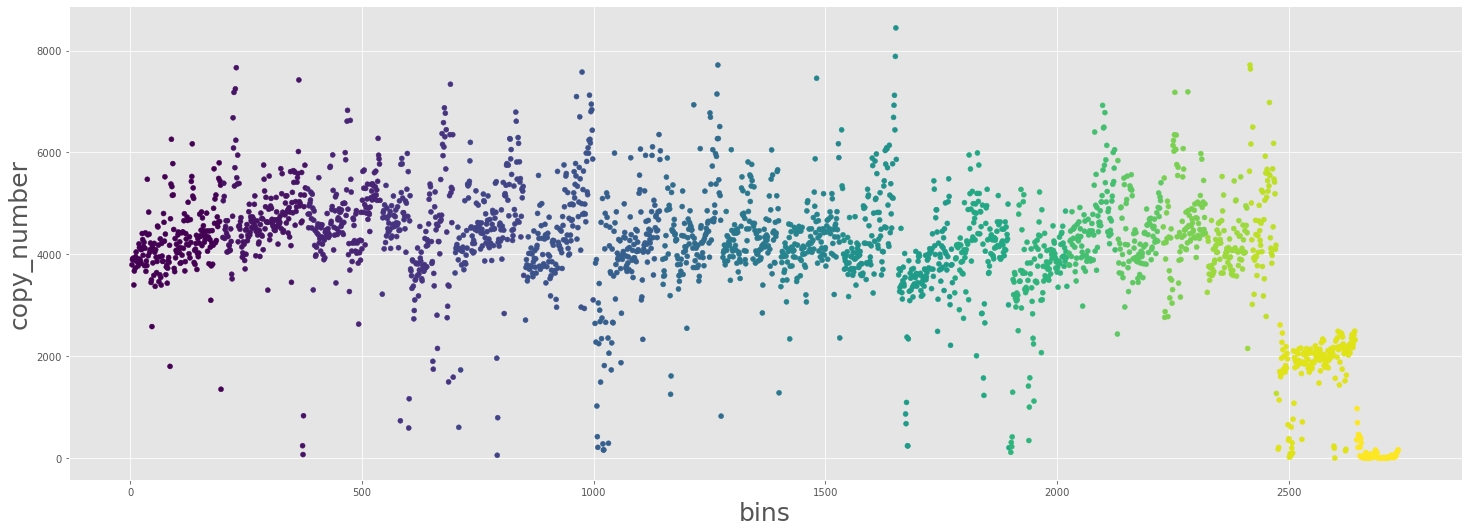

<Figure size 216x72 with 0 Axes>

In [17]:
primary_plot = plt.scatter(copy_df['bin_ind'], copy_df['counts'], c = copy_df['chr_ind'],s = 25)
plt.rcParams["figure.figsize"] = [20.50, 7.50]
plt.rcParams["figure.autolayout"] = True
plt.xlabel('bins', size = 25)
plt.ylabel('copy_number', size = 25)
plt.figure(figsize=(3, 1))
plt.show()

In [18]:
copy_df['mean_normalised_counts'] = cnv.normalise_to_fixed_value(copy_df['counts'] ,"mean")  
copy_df['median_normalised_counts'] = cnv.normalise_to_fixed_value(copy_df['counts'] ,"median")  
copy_df['mode_normalised_counts'] = cnv.normalise_to_fixed_value(copy_df['counts'] ,"mode")  

[]

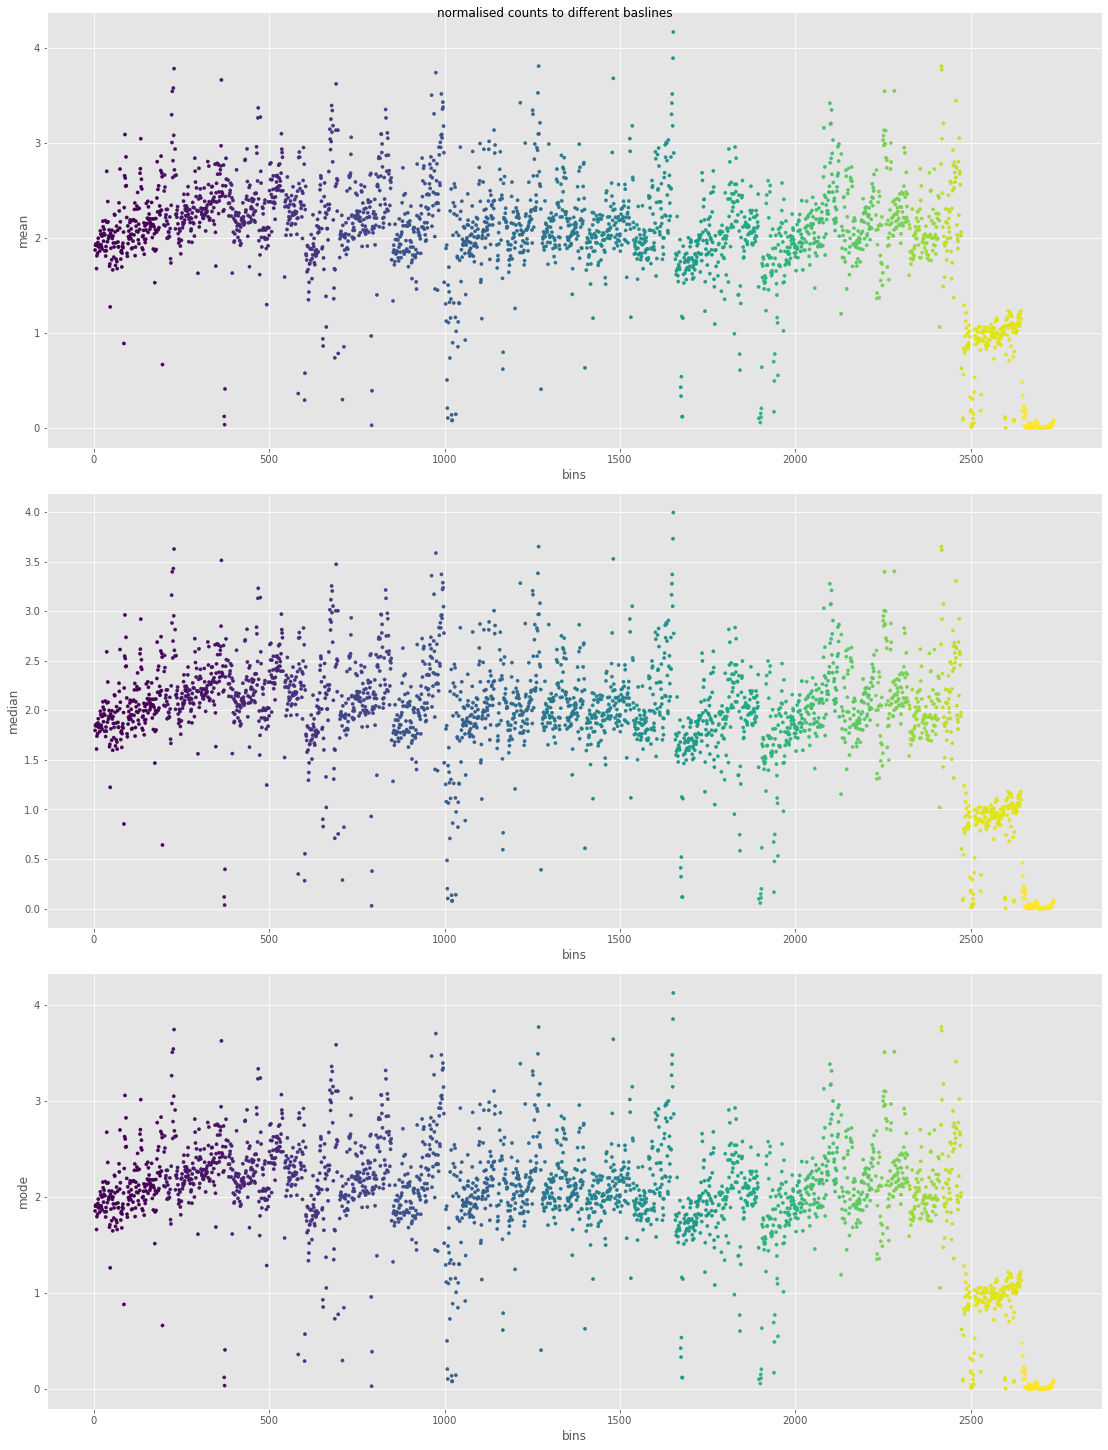

In [44]:
fig0, axs0 = plt.subplots(3)
fig0.suptitle('normalised counts to different baslines')
axs0[0].scatter(copy_df['bin_ind'], copy_df['mean_normalised_counts'],
                c = copy_df['chr_ind'],s = 10)
axs0[1].scatter(copy_df['bin_ind'], copy_df['median_normalised_counts'],
                c = copy_df['chr_ind'],s = 10)
axs0[2].scatter(copy_df['bin_ind'], copy_df['mode_normalised_counts'],
                c = copy_df['chr_ind'],s = 10)
axs0[0].set(xlabel='bins', ylabel = 'mean')
axs0[1].set(xlabel='bins', ylabel = 'median')
axs0[2].set(xlabel='bins', ylabel = 'mode')

plt.rcParams["figure.figsize"] = [15.50, 20.50]
plt.rcParams["figure.autolayout"] = True
plt.plot()


In [19]:
copy_df = copy_df.drop(copy_df[copy_df.chr_ind== 20].index)
copy_df = copy_df.drop(copy_df[copy_df.chr_ind == 21].index)

[]

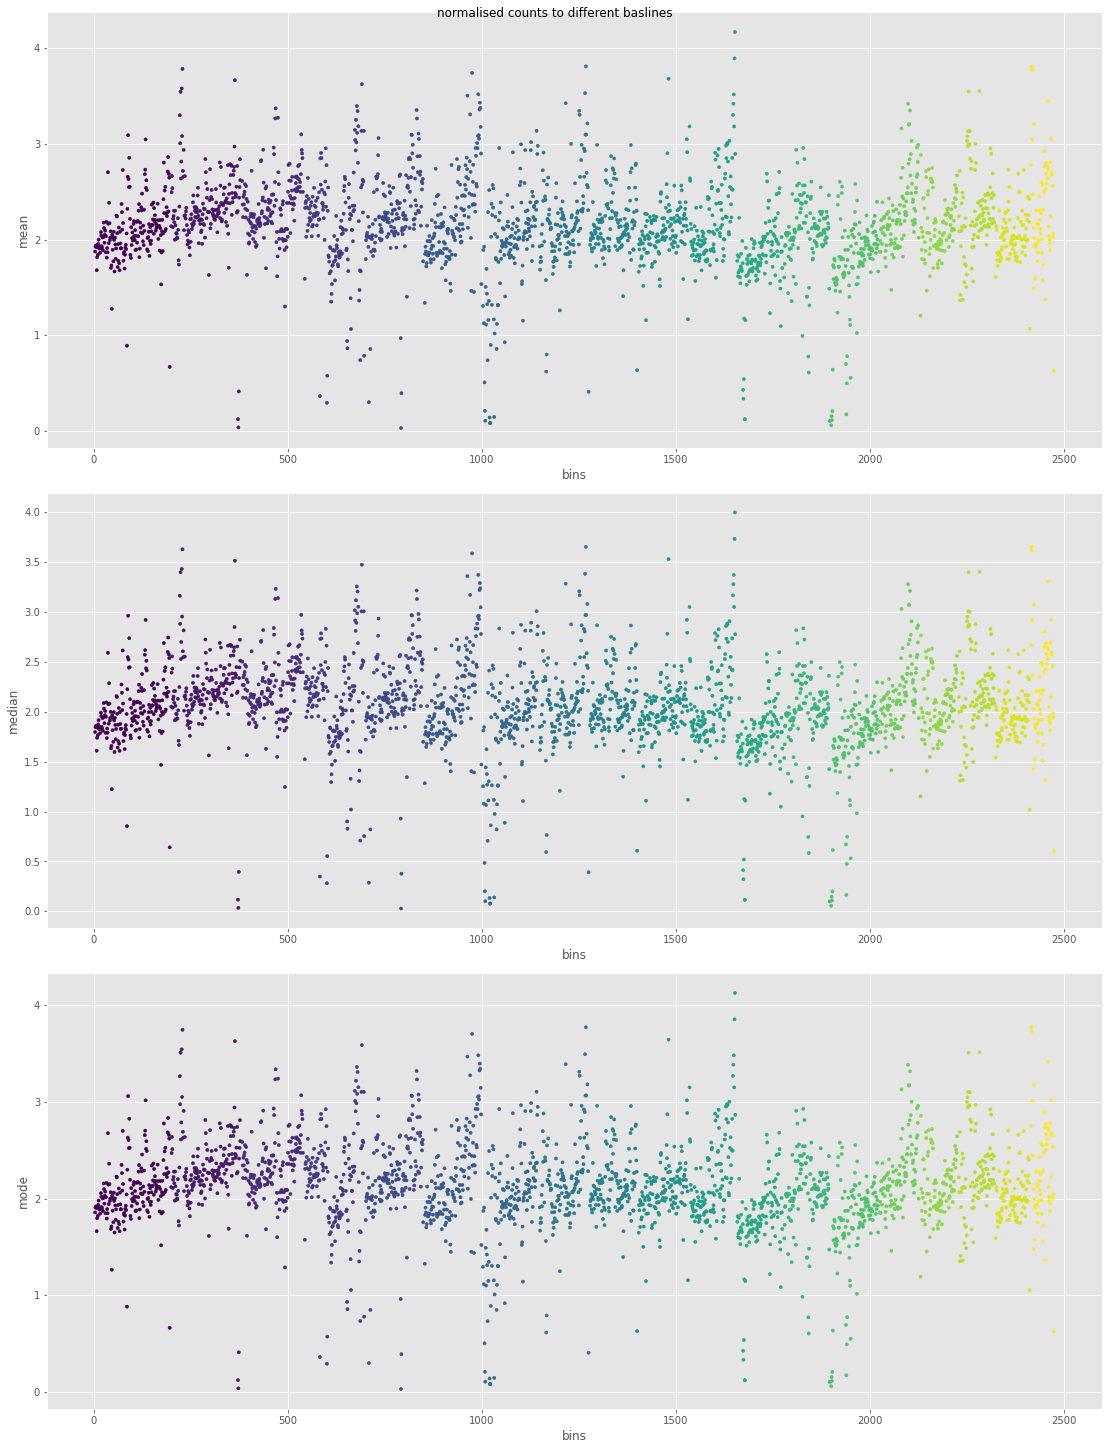

In [46]:
fig1, axs1 = plt.subplots(3)
fig1.suptitle('normalised counts to different baslines')
axs1[0].scatter(copy_df['bin_ind'], copy_df['mean_normalised_counts'],
                c = copy_df['chr_ind'],s = 10)
axs1[1].scatter(copy_df['bin_ind'], copy_df['median_normalised_counts'],
                c = copy_df['chr_ind'],s = 10)
axs1[2].scatter(copy_df['bin_ind'], copy_df['mode_normalised_counts'],
                c = copy_df['chr_ind'],s = 10)
axs1[0].set(xlabel='bins', ylabel = 'mean')
axs1[1].set(xlabel='bins', ylabel = 'median')
axs1[2].set(xlabel='bins', ylabel = 'mode')

plt.rcParams["figure.figsize"] = [15.50, 20.50]
plt.rcParams["figure.autolayout"] = True
plt.plot()

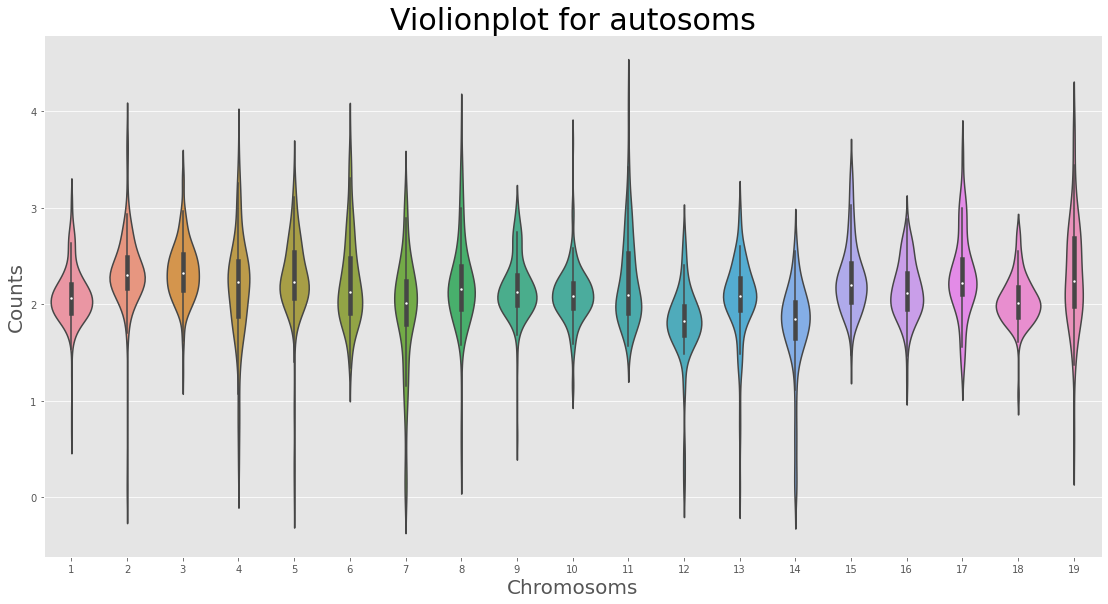

In [54]:
fig2 = sns.violinplot(x = copy_df.chr_ind , y = copy_df.mean_normalised_counts)
fig2.set_title('Violionplot for autosoms',fontsize = 30)
plt.xlabel("Chromosoms", size = 20)
plt.ylabel("Counts", size = 20)
plt.rcParams["figure.figsize"] = [15.50, 8.50]
plt.rcParams["figure.autolayout"] = True
plt.show()

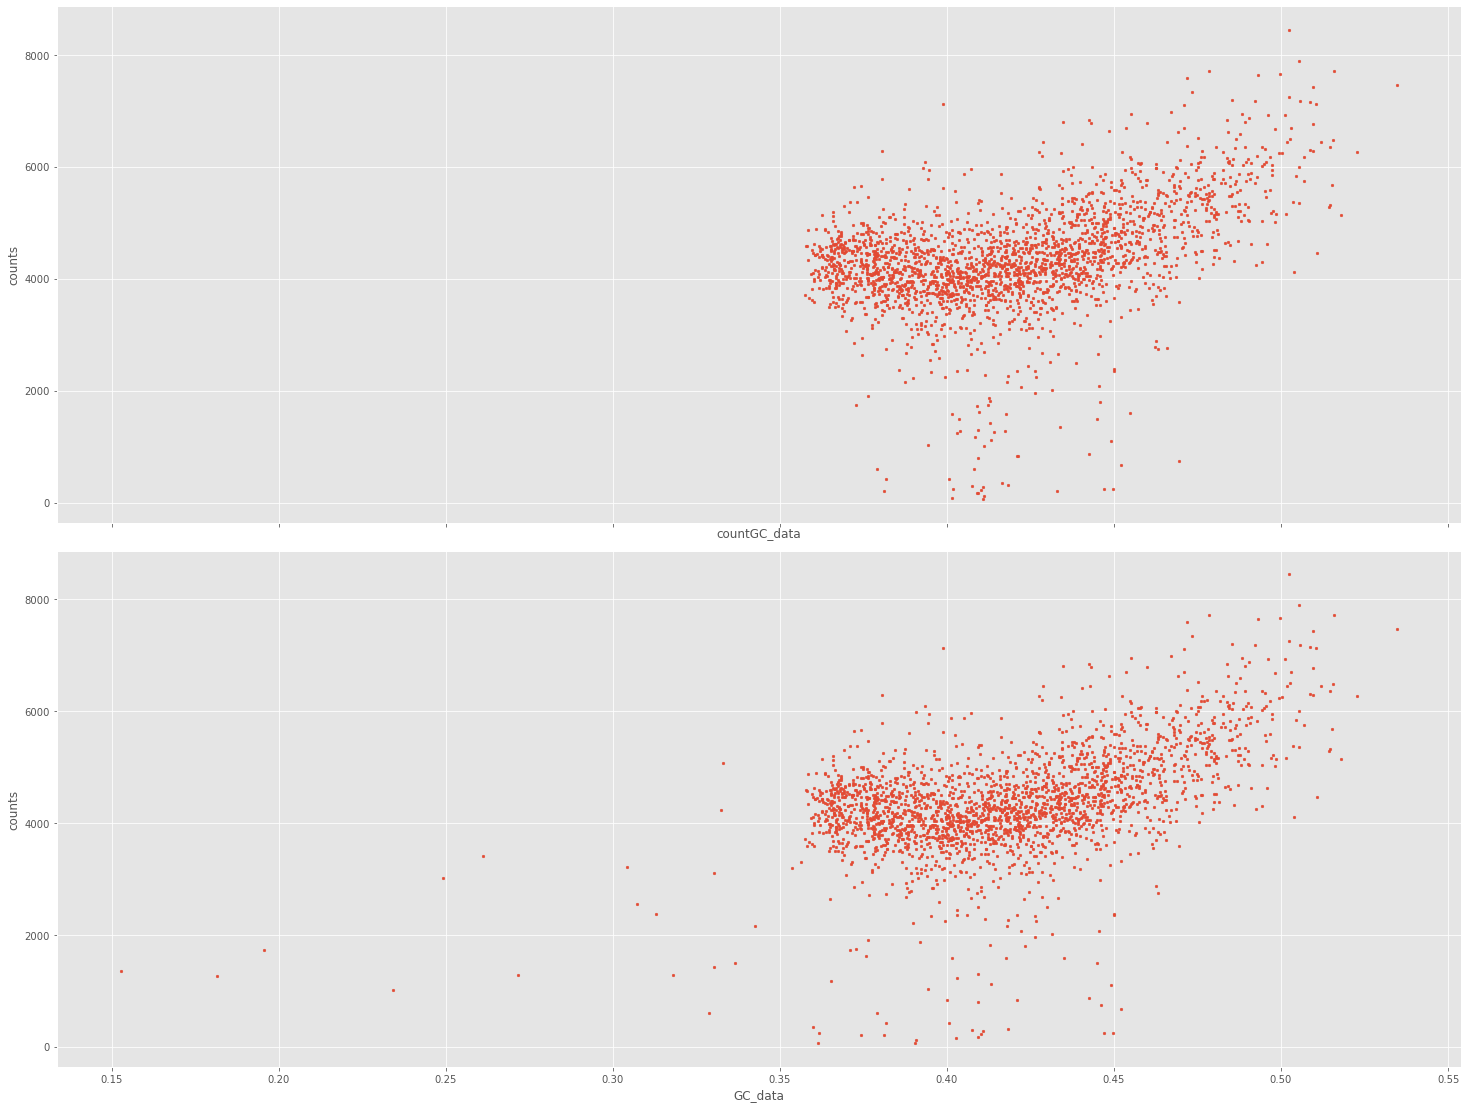

In [163]:
fig3, axs3 =  plt.subplots(nrows = 2, ncols = 1, sharex = True)
axs3[0].scatter(copy_df['GC_content'], copy_df['counts'], s = 7)
axs3[1].scatter(copy_df['GC_content1'] / 100,copy_df['counts'], s = 7)
axs3[0].set(xlabel='countGC_data', ylabel='counts')
axs3[1].set(xlabel='GC_data', ylabel='counts')
plt.show()

In [83]:
copy_df = copy_df.drop('GC_content1',axis=1)

In [20]:
median_counts = []
cg_window = []
for i in range (3500,5200,5):
    median_counts.append(copy_df.loc[(copy_df.GC_content >= (i/10000)-0.01) &
                                     (copy_df.GC_content <= (i/10000)+0.015)].counts.median())
    cg_window.append(copy_df.loc[(copy_df.GC_content >= (i/10000)-0.01) &
                                     (copy_df.GC_content <= (i/10000)+0.015)].GC_content.median())


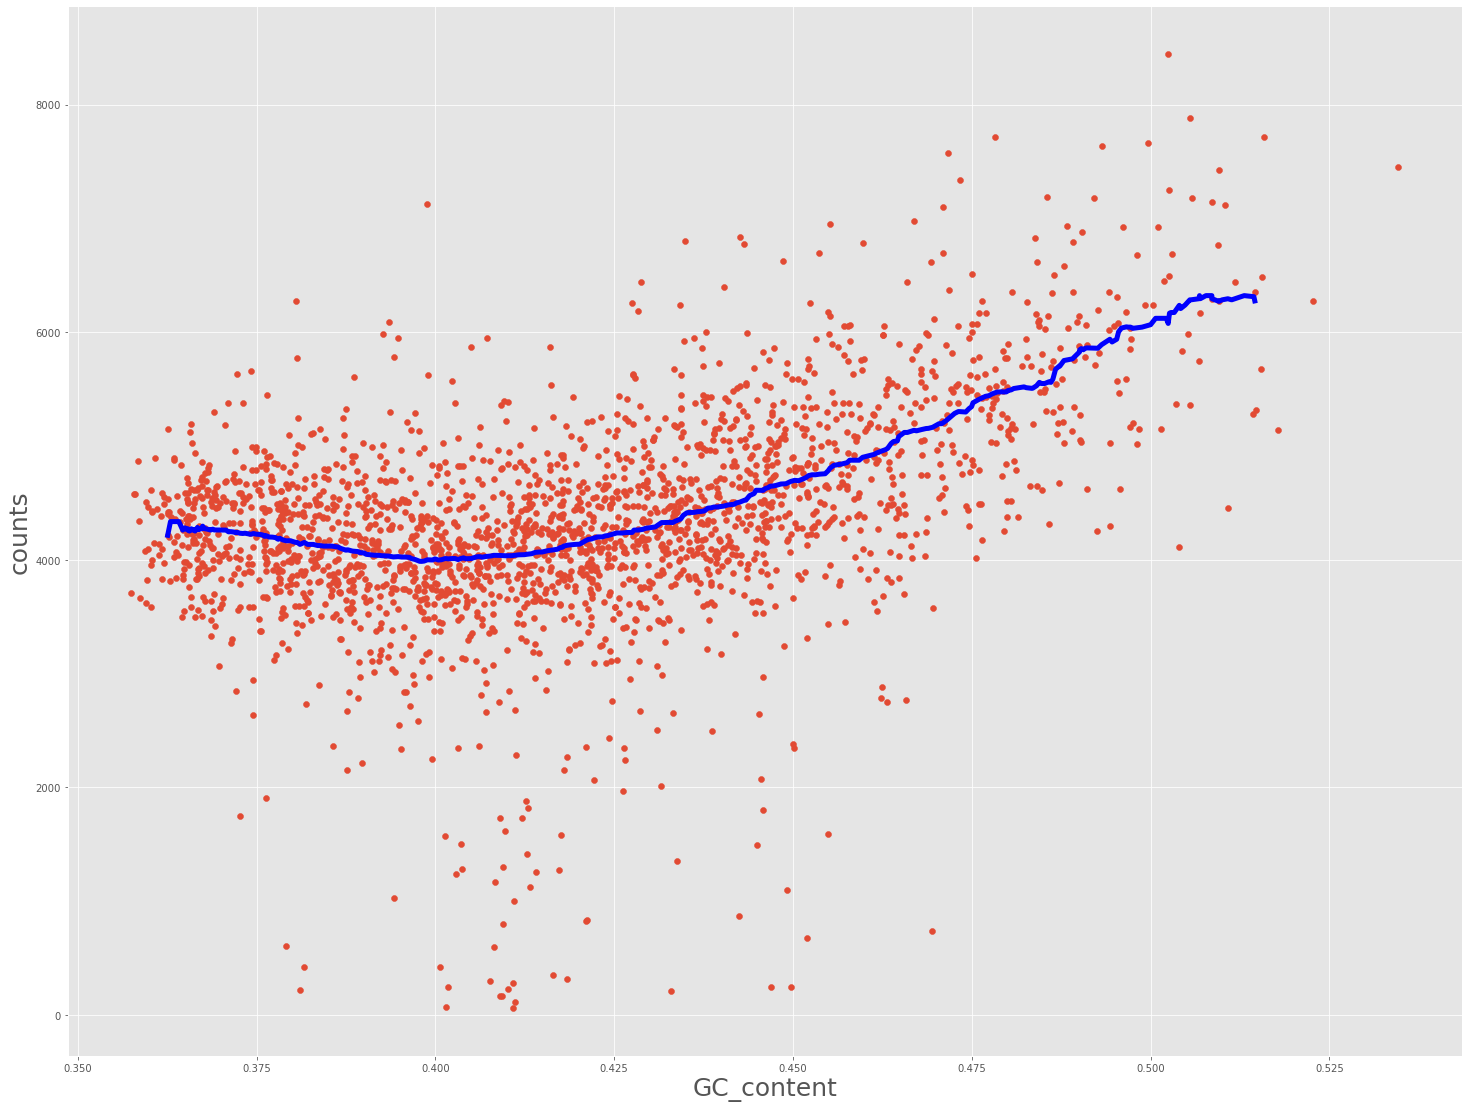

<Figure size 216x72 with 0 Axes>

In [22]:
# after removing the genosomes
fig4 = plt.scatter(copy_df['GC_content'],copy_df['counts'])
plt.plot(cg_window, median_counts,color="b",linewidth=5.0)
plt.rcParams["figure.figsize"] = [20.50, 15.50]
plt.rcParams["figure.autolayout"] = True
plt.xlabel('GC_content', size = 25)
plt.ylabel('counts', size = 25)
plt.figure(figsize=(3, 1))
plt.show()

In [23]:
cnv.gc_correction(copy_df,copy_df.GC_content,copy_df.counts,3450,5200,5,10000,0.02)

In [24]:
median_gc_counts = []
cg_norm_window = []
for i in range (3500,5200,5):
    median_gc_counts.append(copy_df.loc[(copy_df.GC_content >= (i/10000)-0.01) & (copy_df.GC_content <= (i/10000)+0.015)].gc_normlised_counts.median())
    cg_norm_window.append(copy_df.loc[(copy_df.GC_content >= (i/10000)-0.01) & (copy_df.GC_content <= (i/10000)+0.015)].GC_content.median())

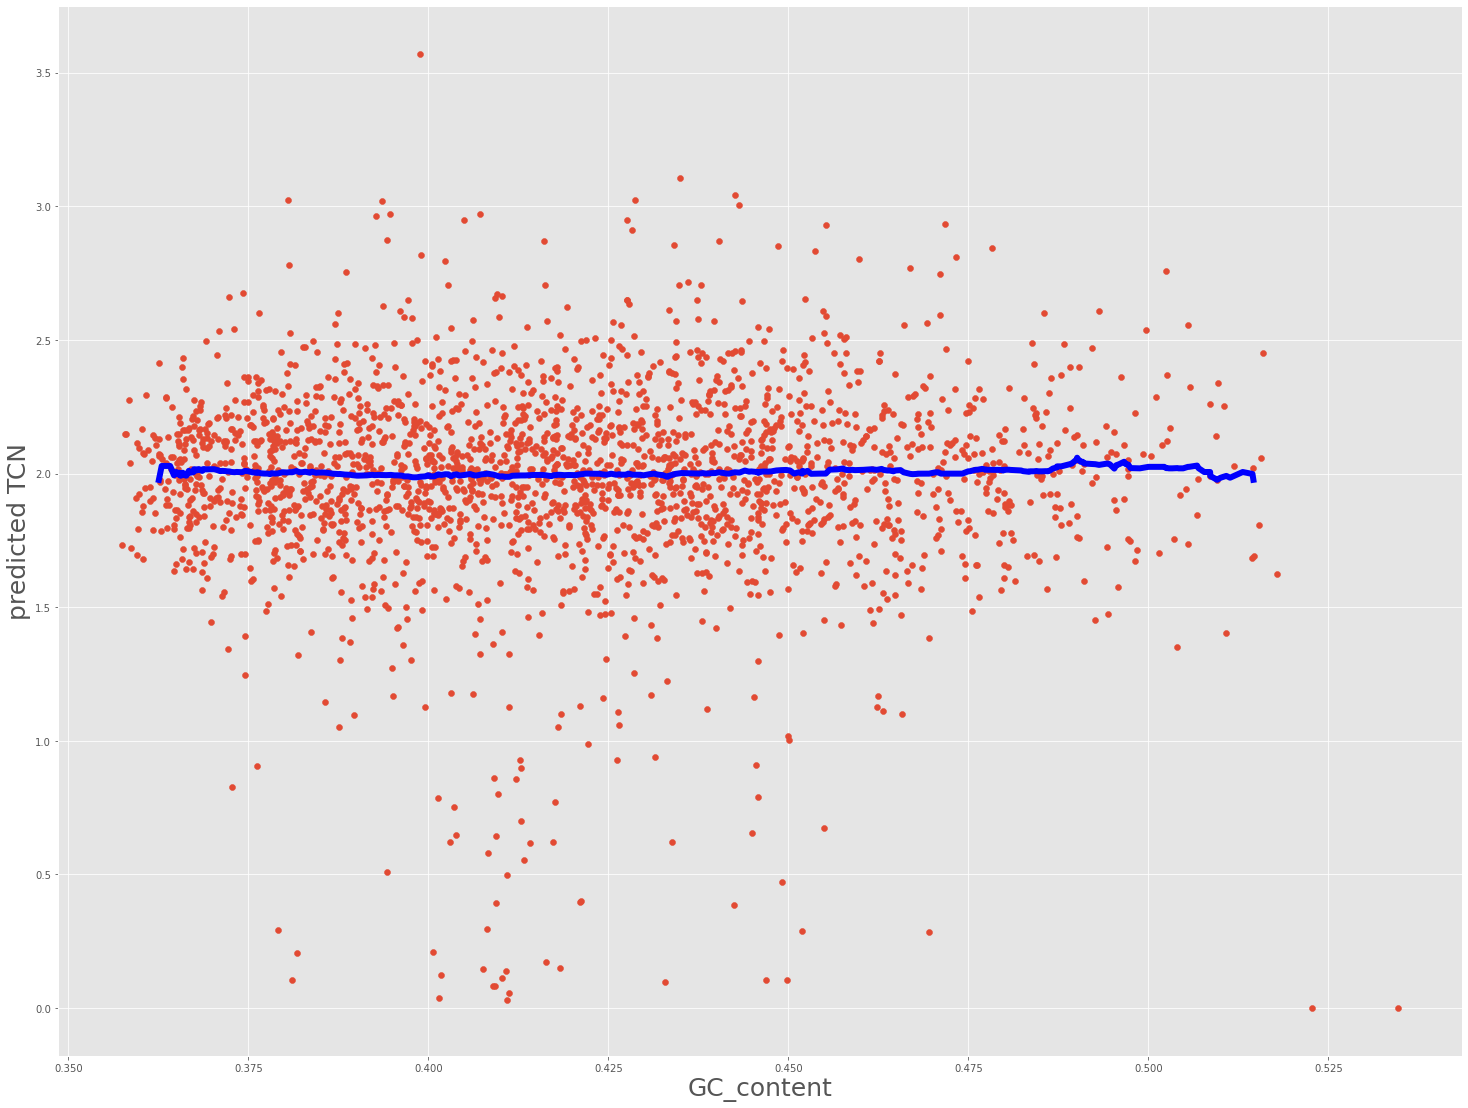

<Figure size 216x72 with 0 Axes>

In [25]:
fig5 = plt.scatter(copy_df['GC_content'],copy_df['gc_normlised_counts'])
plt.plot(cg_norm_window, median_gc_counts,color="b",linewidth=6.0)
plt.rcParams["figure.figsize"] = [20.50, 15.50]
plt.rcParams["figure.autolayout"] = True
plt.xlabel('GC_content', size = 25)
plt.ylabel('predicted TCN', size = 25)
plt.figure(figsize=(3, 1))
plt.show()